In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'log', 'sample', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
I=np.eye(2)

In [12]:
means_1=np.array([0,1])

In [16]:
means_sample_1=sts.multivariate_normal.rvs(means_1, cov=I, size=10, random_state=0)

In [17]:
means_sample_2=sts.multivariate_normal.rvs(np.array([1,0]), cov=I, size=10, random_state=0)

In [24]:
means_sample_1.mean(axis=0)
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [223]:
train_sample=np.array([[0,0]])
for i in range(0,100):
    m=np.random.choice(10)
    
    inst=sts.multivariate_normal.rvs(means_sample_1[m], cov=I/5, size=1).reshape((1,2))
   
    train_sample=np.vstack((train_sample, inst))
    m=np.random.choice(10)
    inst=sts.multivariate_normal.rvs(means_sample_2[m], cov=I/5, size=1).reshape((1,2))
    
    train_sample=np.vstack((train_sample, inst))

y_train=[0 if i%2==0 else 1 for i in range(200)]
train_sample=np.delete(train_sample, 0,0)

In [224]:
test_sample=np.array([[0,0]])
for i in range(0,100):
    m=np.random.choice(10)
    
    inst=sts.multivariate_normal.rvs(means_sample_1[m], cov=I/5, size=1).reshape((1,2))
   
    test_sample=np.vstack((test_sample, inst))
    m=np.random.choice(10)
    inst=sts.multivariate_normal.rvs(means_sample_2[m], cov=I/5, size=1).reshape((1,2))
    
    test_sample=np.vstack((test_sample, inst))

y_test=[0 if i%2==0 else 1 for i in range(200)]
test_sample=np.delete(test_sample, 0,0)

In [217]:

from matplotlib.colors import ListedColormap
colors=ListedColormap(["red", "blue"])


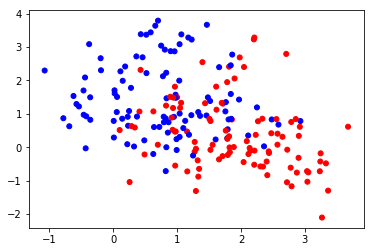

In [225]:

plt.scatter(train_sample[:,0], train_sample[:,1], c=y, cmap=colors, s=25)


In [235]:
from sklearn import linear_model, neighbors, tree, ensemble

In [263]:
lm=linear_model.LinearRegression()
log=linear_model.LogisticRegressionCV()
kn=neighbors.KNeighborsClassifier(n_neighbors=5)
tr=tree.DecisionTreeClassifier(max_depth=8)
forest=ensemble.RandomForestClassifier()

In [222]:
from sklearn import model_selection

In [227]:
cv1=model_selection.cross_val_score(lm, train_sample, y)
cv2=model_selection.cross_val_score(log, train_sample, y)
cv3=model_selection.cross_val_score(kn, train_sample, y)

In [228]:
cv1.mean(axis=0)

0.3609451548536035

In [229]:
print("linear model {:.2f}, logistic {:.2f}, knn {:.2f}".format(cv1.mean(axis=0),cv2.mean(axis=0),cv3.mean(axis=0) ))

linear model 0.36, logistic 0.72, knn 0.69


In [203]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [249]:
from sklearn import metrics
light_colors = ListedColormap(['lightcoral', 'lightblue'])
colors=ListedColormap(["red", "blue"])
def plot_decision_surface(estimator, train_data, train_labels,
                          test_data, test_labels,
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

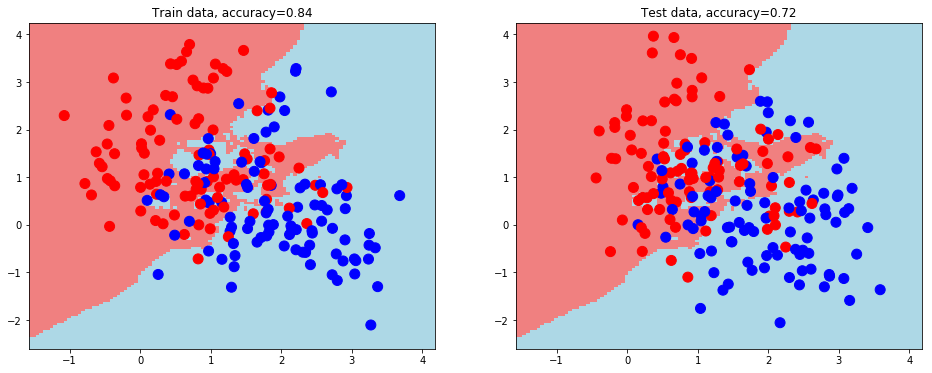

In [264]:
plot_decision_surface(kn, train_sample, y_train, test_sample, y_test)

In [252]:
kn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [253]:
param={"n_neighbors":[2,5,10,15,20]}

In [257]:

grid=model_selection.GridSearchCV(kn, param_grid=param)
grid.fit(train_sample, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')